In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/chentingkao/PracticeData/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
# replace '?' with na value
df_replaced = df.replace('?', np.nan)

# fill na value with mode value for each column
# mode() returns a Series. We need to get the first value for the real value.
for column_name in df_replaced.columns:
  df_replaced[column_name] = df_replaced[column_name].fillna(df_replaced[column_name].mode()[0])

df_replaced.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
# Check if the labels is balanced
# normalize = True calculates the proportion of each unique value relative to
# the total number of values in the Series.
income = df_replaced['income'].value_counts(normalize = True)
print(income)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/599405538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = income.index, y = income.values, palette = 'bright')


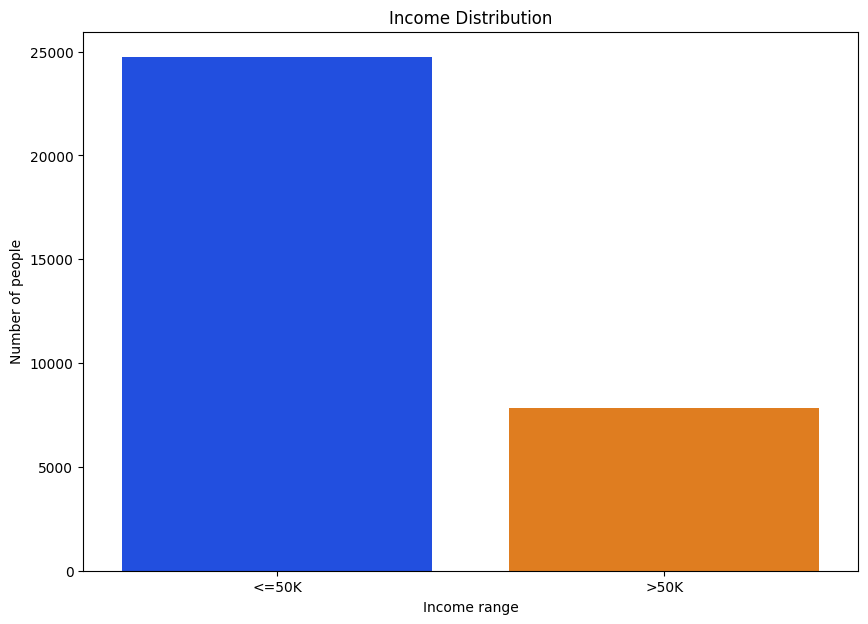

In [20]:
# Create a barchart to visualize the label
import matplotlib.pyplot as plt
import seaborn as sns

income = df_replaced['income'].value_counts()
plt.figure(figsize = (10, 7))
# Use income.index in Series to get the name of unique value
# palette 調色盤
sns.barplot(x = income.index, y = income.values, palette = 'bright')

plt.xlabel('Income range')
plt.ylabel('Number of people')
plt.title('Income Distribution')

# 座標軸的字體大小
plt.tick_params(labelsize = 10)
plt.show()

/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/3069483579.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_replaced['age'], bins = 20)


Text(0.5, 0, 'Age')

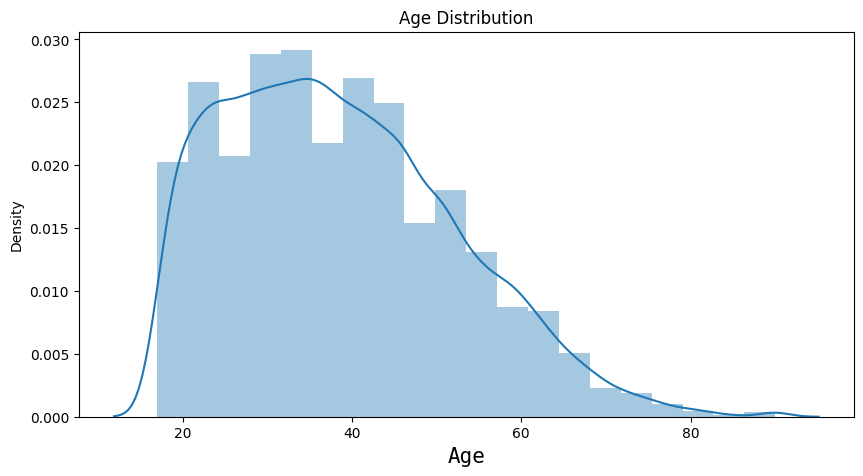

In [29]:
# the smallest age is 17. the largest age is 90
df_replaced['age'].value_counts().sort_index()

plt.figure(figsize = (10, 5))
sns.distplot(df_replaced['age'], bins = 20)

plt.title('Age Distribution')
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})


/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/2667780164.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = education.values, y = education.index, palette = rainbow_palette)


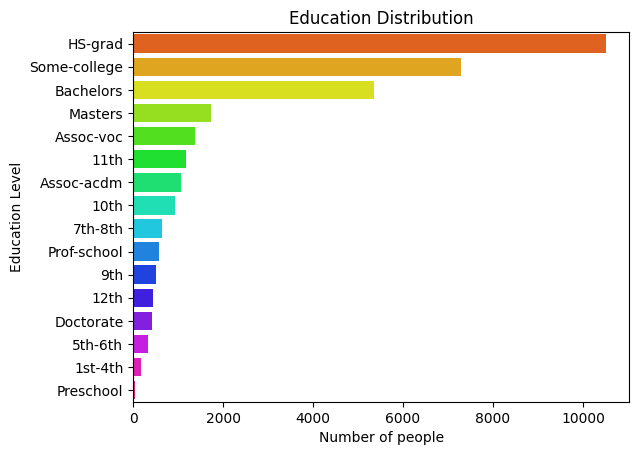

In [34]:
# Create and display a barplot for 'Education' using Seaborn, where the x-axis represents the count of people with each education level (edu.values), and the y-axis represents the different education categories (edu.index).
education = df_replaced['education'].value_counts()


rainbow_palette = sns.color_palette("hsv", len(education.index))

sns.barplot(x = education.values, y = education.index, palette = rainbow_palette)
plt.xlabel('Number of people')
plt.ylabel('Education Level')
plt.title('Education Distribution')
plt.show()


/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/1286554194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = education_years.index, y = education_years.values, palette = 'bright')


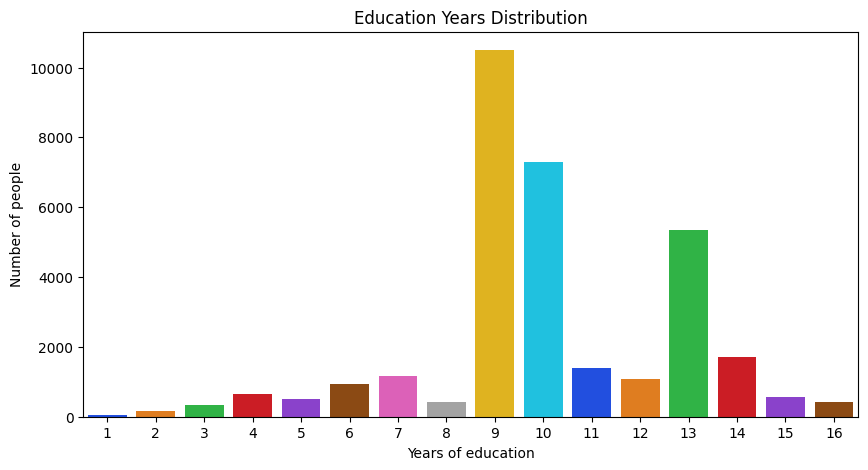

In [37]:
# Create and display a barplot for 'Years of Education' using the Seaborn library to visualize the distribution of years of education where, x = edu_num.index represents the unique education levels, and y = edu_num.values represents the corresponding counts.

education_years = df_replaced['education.num'].value_counts()

plt.figure(figsize = (10, 5))
sns.barplot(x = education_years.index, y = education_years.values, palette = 'bright')

plt.xlabel('Years of education')
plt.ylabel('Number of people')
plt.title('Education Years Distribution')
plt.show()

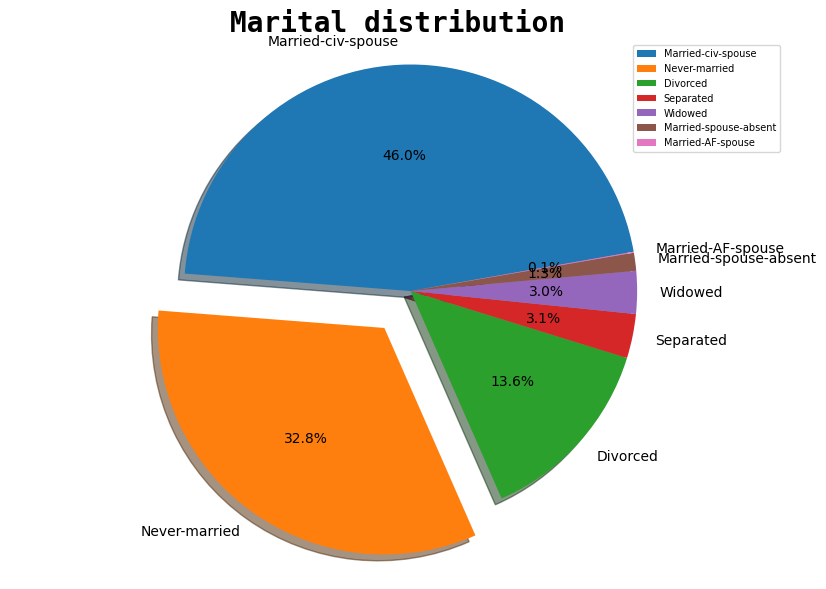

In [40]:
# Creating a pie chart for 'Marital status'
mariage = df_replaced['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))

# the length of explode should match the length of columns
plt.pie(mariage.values, labels=mariage.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/1855113735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = hours.index, y = hours.values, palette='colorblind')


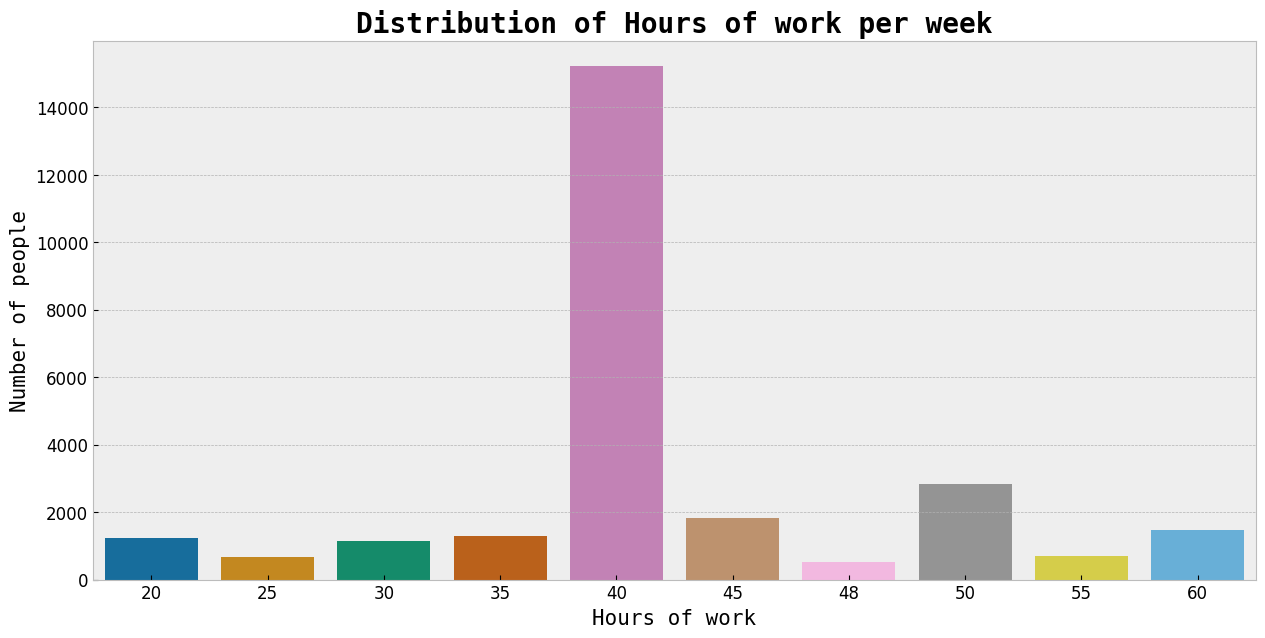

In [42]:
# Creating a barplot for 'Hours per week'
hours = df_replaced['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x = hours.index, y = hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

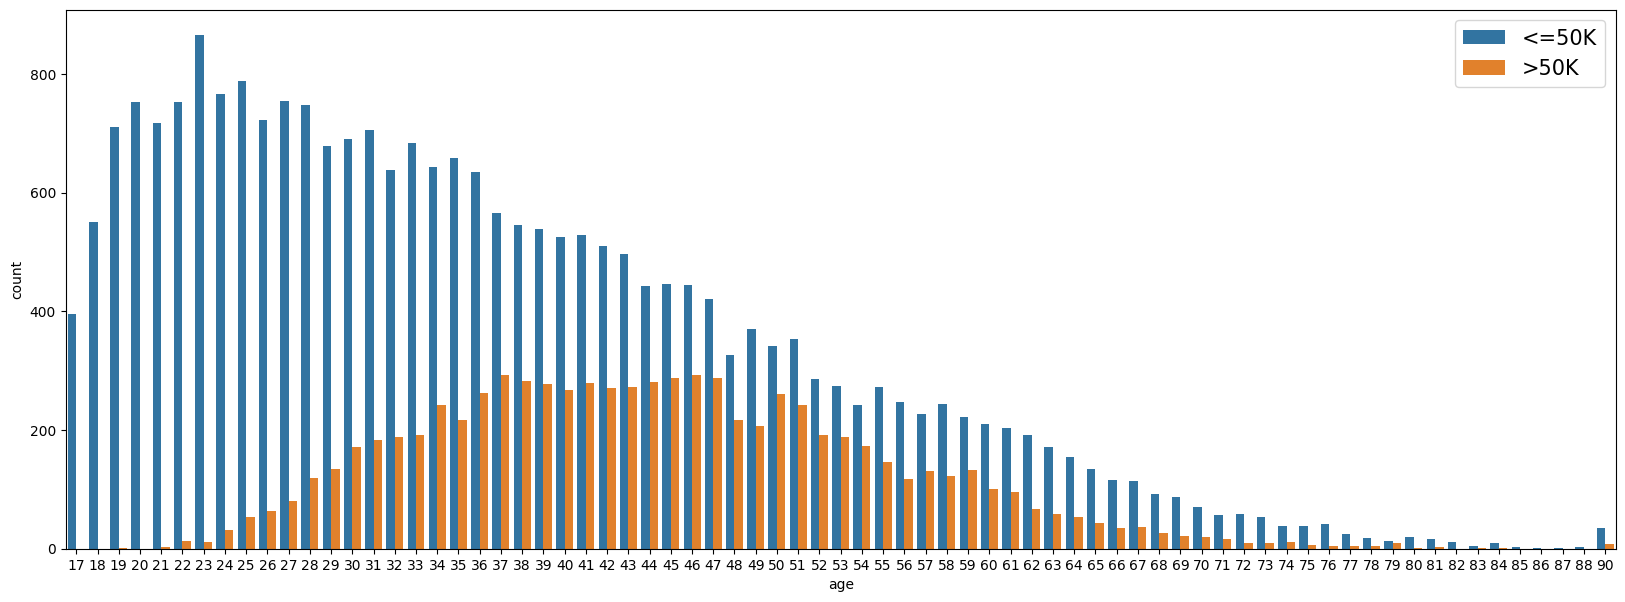

In [44]:
# Creating a countplot of income across age
income = df_replaced['income']
age = df_replaced['age']

plt.style.use('default')
plt.figure(figsize = (20, 7))

# The hue parameter adds a second level of grouping to the plot by a
# different categorical variable, income. The income variable should also be a
# column name from a DataFrame or a Series. This will result in each age
# category being further divided by the different income categories, and each
# bar will be color-coded according to the income categories.
sns.countplot(x = age, hue = income)

plt.legend(loc=1, prop={'size': 15})
plt.show()

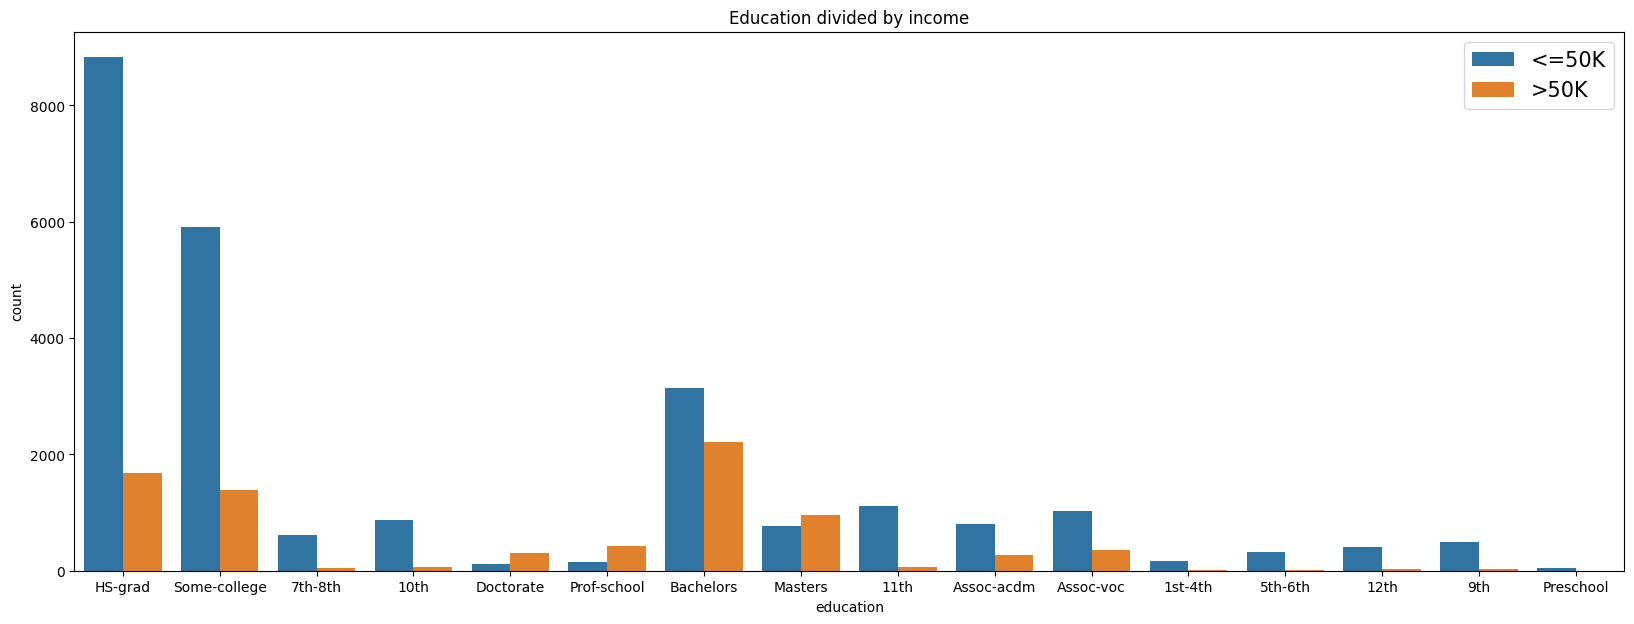

In [46]:
# Create and display countplot of income across education using Seaborn, where 'education' is plotted on the x-axis, and the count is represented by the height of the bars. The bars are colored based on the 'income' variable.
plt.figure(figsize = (20, 7))
sns.countplot(x = df_replaced['education'], hue = df_replaced['income'])
plt.legend(loc = 1, prop = {'size': 15})
plt.title('Education divided by income')
plt.show()

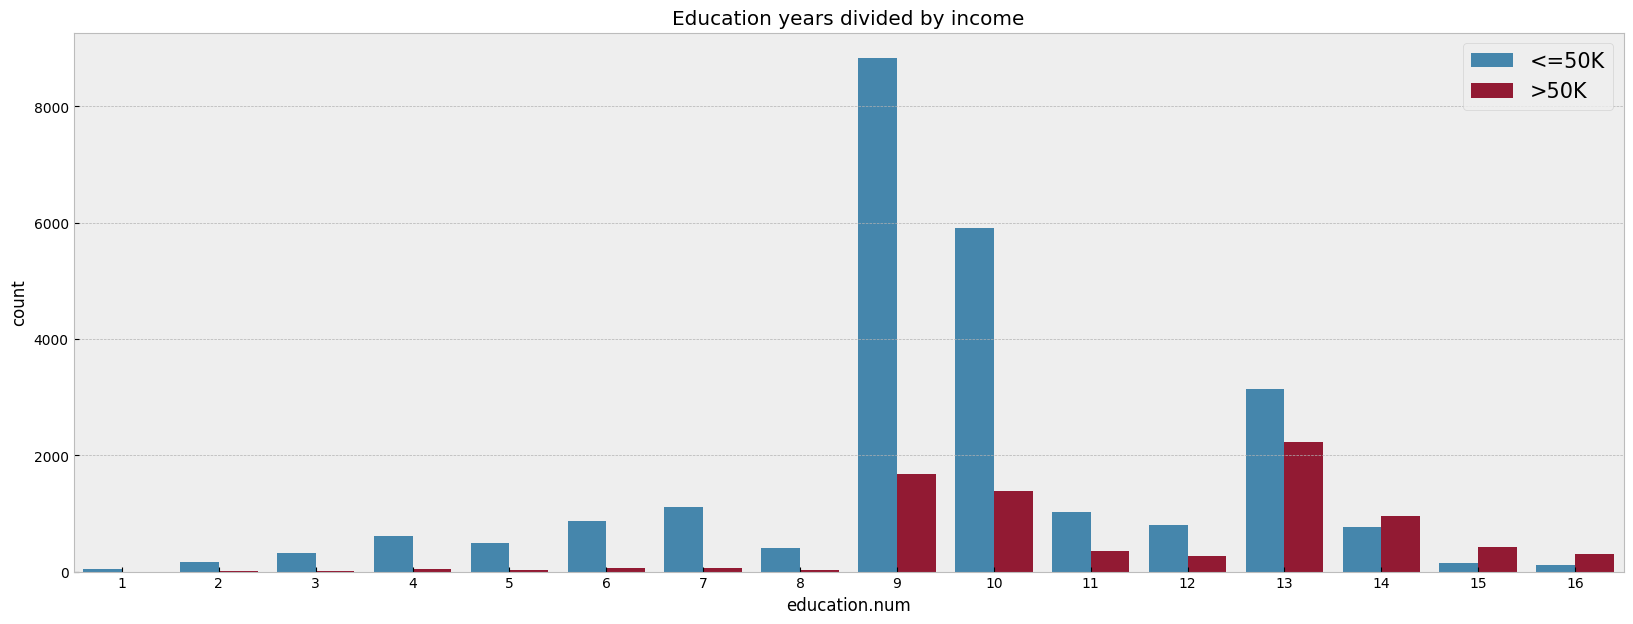

In [49]:
# Creating a countplot of income across years of education

# This is one of the many predefined styles available in Matplotlib. The 'bmh'
# style was inspired by the default styles of the Bayesian Methods for Hackers
# (BMH) book, which emphasizes clarity and readability. It provides a clean and
# minimalist look to the plots.
plt.style.use('bmh')

plt.figure(figsize = (20, 7))
sns.countplot(x = df_replaced['education.num'], hue = df_replaced['income'])
plt.legend(loc = 1, prop = {'size': 15})
plt.title('Education years divided by income')

# 1 is for upper right corner
plt.legend(loc=1, prop={'size': 15})

# The plt.savefig() function in Matplotlib saves the current figure to a file.
plt.savefig('bi2.png')

plt.show()

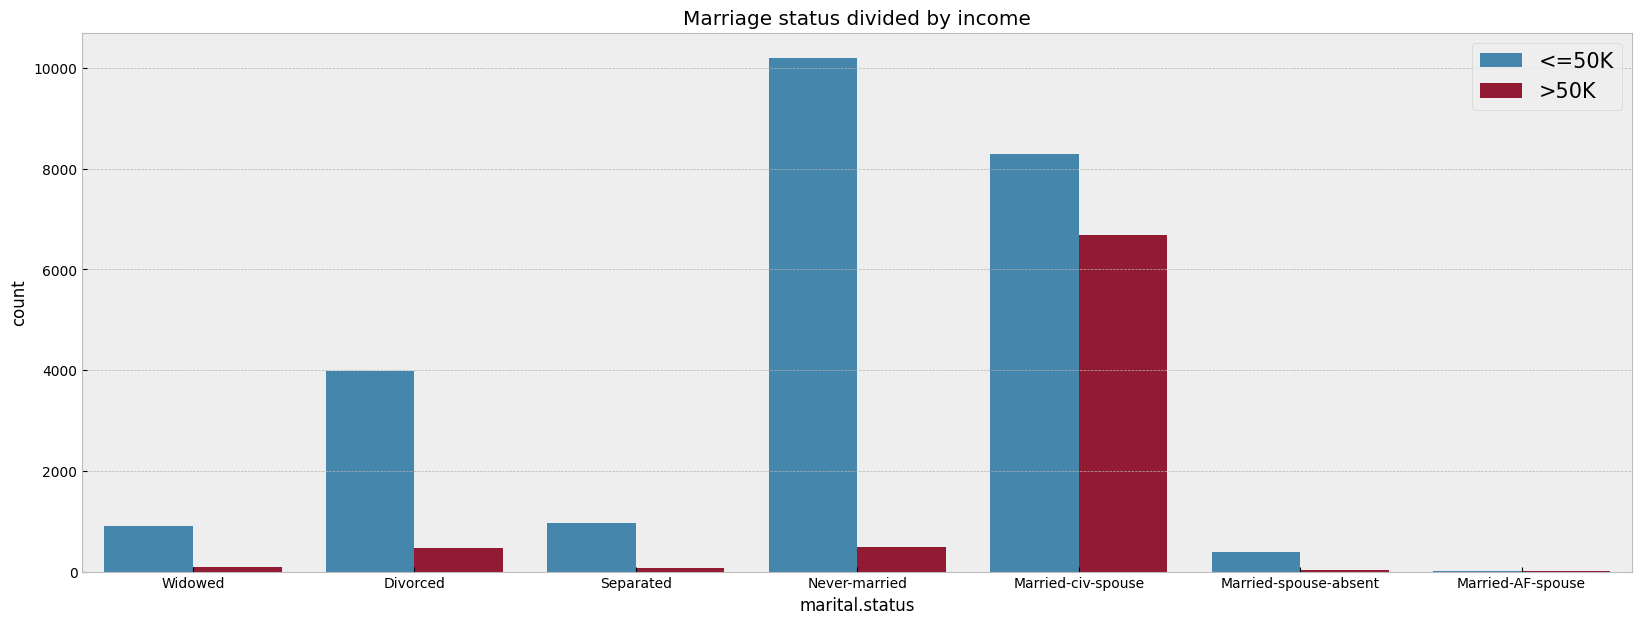

In [50]:
# Use the Seaborn library to create and display a countplot to visualize the distribution of income across different marital statuses where the x-axis represents the marital status categories, and the bars are colored based on income

plt.style.use('bmh')

plt.figure(figsize = (20, 7))
sns.countplot(x = df_replaced['marital.status'], hue = df_replaced['income'])
plt.legend(loc = 1, prop = {'size': 15})
plt.title('Marriage status divided by income')

# 1 is for upper right corner
plt.legend(loc=1, prop={'size': 15})

plt.show()


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_replaced.columns:
    if df_replaced[col].dtypes == 'object':
        df_replaced[col] = le.fit_transform(df_replaced[col])

df_replaced.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


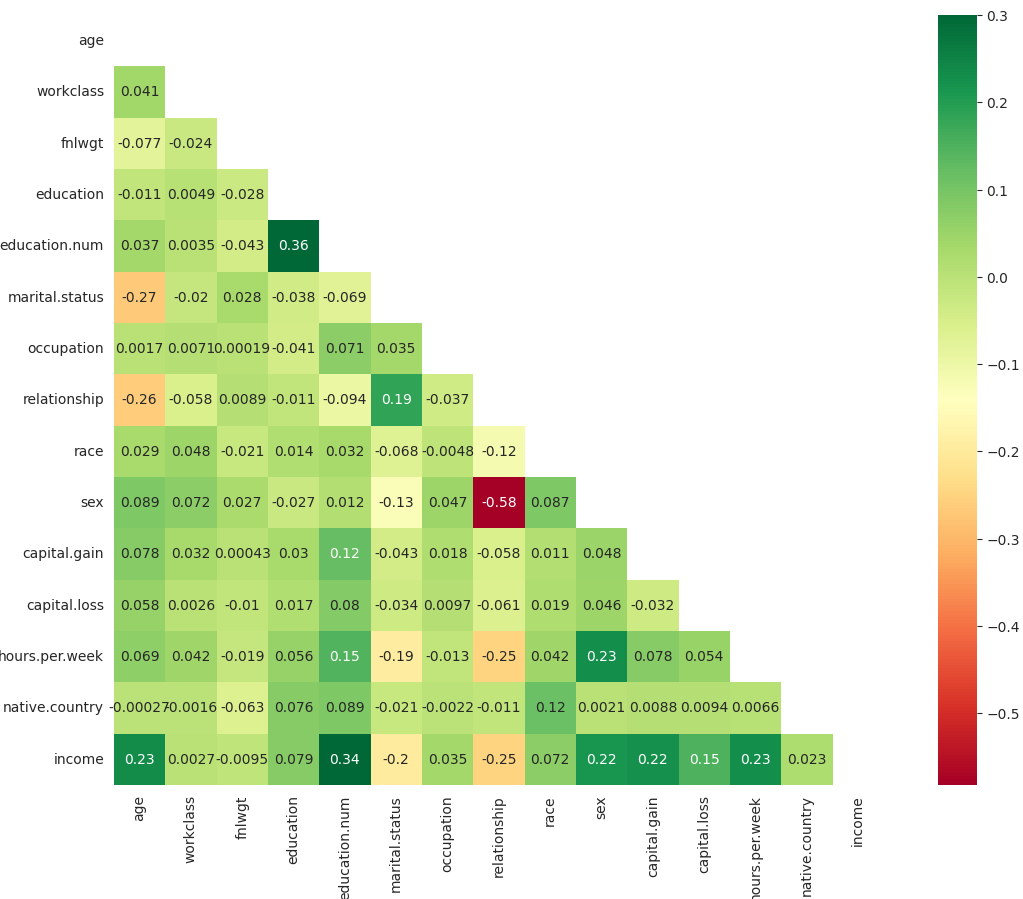

In [62]:
corr = df_replaced.corr()

# np.zeros_like(corr):
# Creates an array of the same shape as corr filled with zeros.
# This array will be used as a mask to hide certain parts of the heatmap.

# np.triu_indices_from(mask):
# Generates the indices for the upper triangle of the array.

# mask[np.triu_indices_from(mask)] = True:
# Sets the values of the upper triangle of the mask array to True.
# This mask will be used to hide the upper triangle of the heatmap, since the
# correlation matrix is symmetric and the upper triangle is a mirror of the lower triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# mask=mask:
# Applies the mask to the heatmap, hiding the upper triangle of the matrix.

# vmax=.3:
# Sets the value that the colors will be normalized to. This sets the maximum
# value for the colormap to 0.3, which helps in scaling the color
# representation.
#
# square=True:
# Ensures that each cell in the heatmap is square-shaped.

# annot=True:
# Annotates each cell with the correlation coefficient value.

# cmap='RdYlGn':
# Sets the colormap to "Red-Yellow-Green". Correlations close to -1 will be red,
# close to 0 will be yellow, and close to 1 will be green.
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.show()


In [67]:
X = df_replaced.drop(['income'], axis = 1)
y = df_replaced['income']

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# X[col]: Accesses the data in the current column of the DataFrame X.
# .values: Converts the column to a NumPy array.
# .reshape(-1, 1): Reshapes the 1D array (column vector) into a 2D array with a
# single feature (required by StandardScaler). -1 means that the number of rows
# is inferred from the length of the array, so the array is reshaped to have
# one column and as many rows as needed.
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [73]:
#import the 'RandomOverSampler' class from the imblearn library
#Then create an instance of RandomOverSampler named 'ros' with a specified random state of 42.
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = ros.fit_resample(X, y)
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [76]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state = 42)
log_model.fit(X_train, y_train)
log_predict = log_model.predict(X_test)

In [77]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
knn_predict = knn_model.predict(X_test)

In [79]:
# SVC
from sklearn import svm

svc_model = svm.SVC(random_state = 42)
svc_model.fit(X_train, y_train)
svc_predict = svc_model.predict(X_test)


In [80]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predict = nb_model.predict(X_test)

In [81]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dct_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 5, random_state = 42)
dct_model.fit(X_train, y_train)
dct_predict = dct_model.predict(X_test)

In [83]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(n_estimators=100, random_state=42)
ran_for.fit(X_train, y_train)
ran_for_predict = ran_for.predict(X_test)